In [1]:
import pandas as pd
import numpy as np

In [2]:
df_bollywood = pd.read_csv('C:/Users/DELL-/Desktop/Data/Machine Learning (Codes and Data Files)/Data/bollywood.csv')

In [3]:
df_bollywood.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [4]:
df_bollywood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
SlNo                   149 non-null int64
Release Date           149 non-null object
MovieName              149 non-null object
ReleaseTime            149 non-null object
Genre                  149 non-null object
Budget                 149 non-null int64
BoxOfficeCollection    149 non-null float64
YoutubeViews           149 non-null int64
YoutubeLikes           149 non-null int64
YoutubeDislikes        149 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 11.7+ KB


There are 149 rows/records in the data.

In [5]:
df_bollywood['Genre'].value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Action        3
Thriller      3
Name: Genre, dtype: int64

Presenting the movies distribution against each genre. Comedy has the highest no. of releases

In [116]:
df_bollywood["Genre"].replace('Thriller ', 'Thriller', inplace=True)
df_bollywood["Genre"].replace('Action ', 'Action', inplace=True)
df_bollywood["Genre"].unique()

array(['Romance', 'Thriller', 'Comedy', ' Drama ', 'Action'], dtype=object)

Removing the redundant names

In [118]:
pd.crosstab(df_bollywood['Genre'], df_bollywood['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,15
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,2,22


Release time for each genre of the movies

In [119]:
import datetime as dt
df_bollywood['RDate']= pd.to_datetime(df_bollywood['Release Date'])
type(df_bollywood['RDate'])
df_bollywood['month']=df_bollywood['RDate'].dt.month
df_bollywood.drop('RDate', inplace = True, axis =1)

In [120]:
df_bollywood.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,ROI
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,1.888889
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,0.200000
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,-0.600000
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,-0.950000
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,-0.400000


In [121]:
df_bollywood['month'].value_counts()

1     20
3     19
5     18
7     16
2     16
4     11
11    10
9     10
6     10
10     9
8      8
12     2
Name: month, dtype: int64

Maximum movies releases in the month of January

In [123]:
A = df_bollywood[df_bollywood['Budget']>25]['month'].value_counts()
B= A.to_frame()
B.columns=["No. of releases per month"]
B

,No. of releases per month
2,9
8,7
11,6
7,6
3,6
1,6
6,5
10,4
9,4
4,4


February has the releases of high budgeted movies (more than 25 cr)

In [124]:
df_bollywood['ROI']=(df_bollywood['BoxOfficeCollection']-df_bollywood['Budget'])/df_bollywood['Budget']

In [125]:
df_bollywood.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,ROI
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,1.888889
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,0.200000
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,-0.600000
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,-0.950000
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,-0.400000


In [126]:
df_bollywood[["MovieName", "Budget", "BoxOfficeCollection", "ROI"]].sort_values(by = ["ROI"], ascending=False)[0:10].reset_index()

,index,MovieName,Budget,BoxOfficeCollection,ROI
0,64,Aashiqui 2,12,110.0,8.166667
1,89,PK,85,735.0,7.647059
2,132,Grand Masti,35,298.0,7.514286
3,135,The Lunchbox,10,85.0,7.500000
4,87,Fukrey,5,36.2,6.240000
5,58,Mary Kom,15,104.0,5.933333
6,128,Shahid,6,40.0,5.666667
7,37,Humpty Sharma Ki Dulhania,20,130.0,5.500000
8,101,Bhaag Milkha Bhaag,30,164.0,4.466667
9,115,Chennai Express,75,395.0,4.266667


Top 10 Movies with maximum return on investments(ROI)

In [127]:
df_ROI_ReleaseTime=df_bollywood.groupby("ReleaseTime")['ROI'].mean().reset_index()

In [128]:
df_ROI_ReleaseTime.sort_values("ROI")

,ReleaseTime,ROI
3,N,0.657722
1,HS,0.850867
0,FS,0.973853
2,LW,1.127205


Movies released during Long Weekend(LW) has more ROI

In [129]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

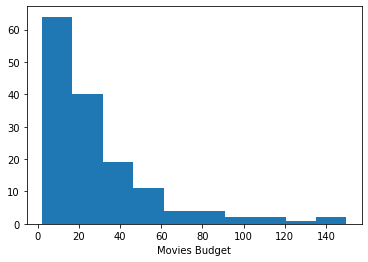

In [130]:
plt.hist(df_bollywood["Budget"])
plt.xlabel('Movies Budget')
plt.show()

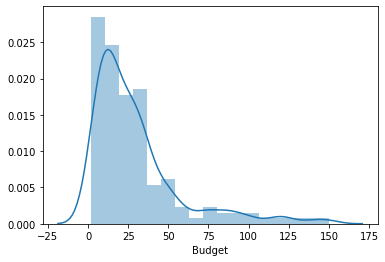

In [131]:
sn.distplot(df_bollywood['Budget'])

With the help of the above histogram and distribution plot, we can conclude that most movies are low budgeted.

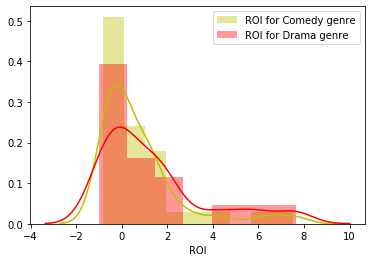

In [132]:
sn.distplot(df_bollywood[df_bollywood['Genre']=="Comedy"]['ROI'], color='y', label ='ROI for Comedy genre')
sn.distplot(df_bollywood[df_bollywood['Genre']==" Drama "]['ROI'], color='r', label ='ROI for Drama genre')
plt.legend()

From the above comparison, it can be concluded that ROI for Comedy Genre movie is higher than ROI for Drama Genre

In [133]:
df_bollywood["BoxOfficeCollection"].corr(df_bollywood["YoutubeLikes"])

0.6825165877731297

Evaluting the correlation between Box office collection and youtube likes, we can conclude that they are positively correlated.

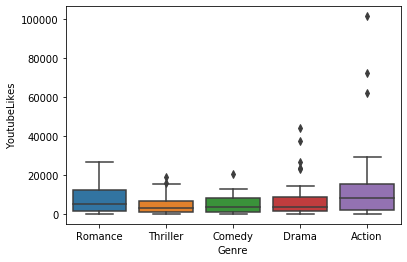

In [134]:
sn.boxplot(x='Genre', y='YoutubeLikes', data=df_bollywood)

From the above boxplots, we may conclude that Action genre movies gets the maximum likes on youtube

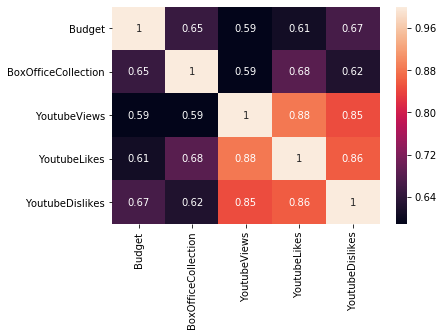

In [135]:
C=['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes','YoutubeDislikes']
sn.heatmap(df_bollywood[C].corr(), annot=True)

From the above heatmap, we can conclude Youtube Views & likes, Youtube Views & dislikes are highly correlated followed by Budget and Box Office collection against youtube likes, dislikes and views.